In [61]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.preprocessing.image import load_img
import cv2
import pandas as pd
import numpy as np

## Hand Sign

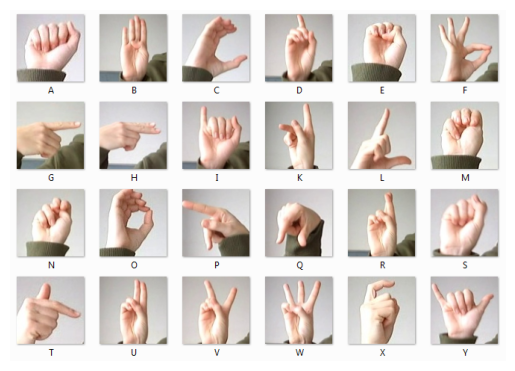

In [47]:
plt.imshow(load_img('/kaggle/input/sign-language-mnist/amer_sign2.png'))
plt.axis('off')
plt.show()

## Load Train and Test dataset

In [48]:
train_path = '/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv'
test_path = '/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv'

In [82]:
train_data_df = pd.read_csv(train_path)

In [259]:
test_data_df = pd.read_csv(test_path)

In [83]:
train_data_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [116]:
train_data = np.array(train_data_df.drop(columns = 'label')).reshape(27455,28,28) / 255

In [117]:
train_label = np.array(train_data_df['label'])

In [268]:
test_data = np.array(test_data_df.drop(columns = 'label')).reshape(len(test_data_df),28,28) / 255

In [269]:
test_lable = test_label = np.array(test_data_df['label'])

## Plot data

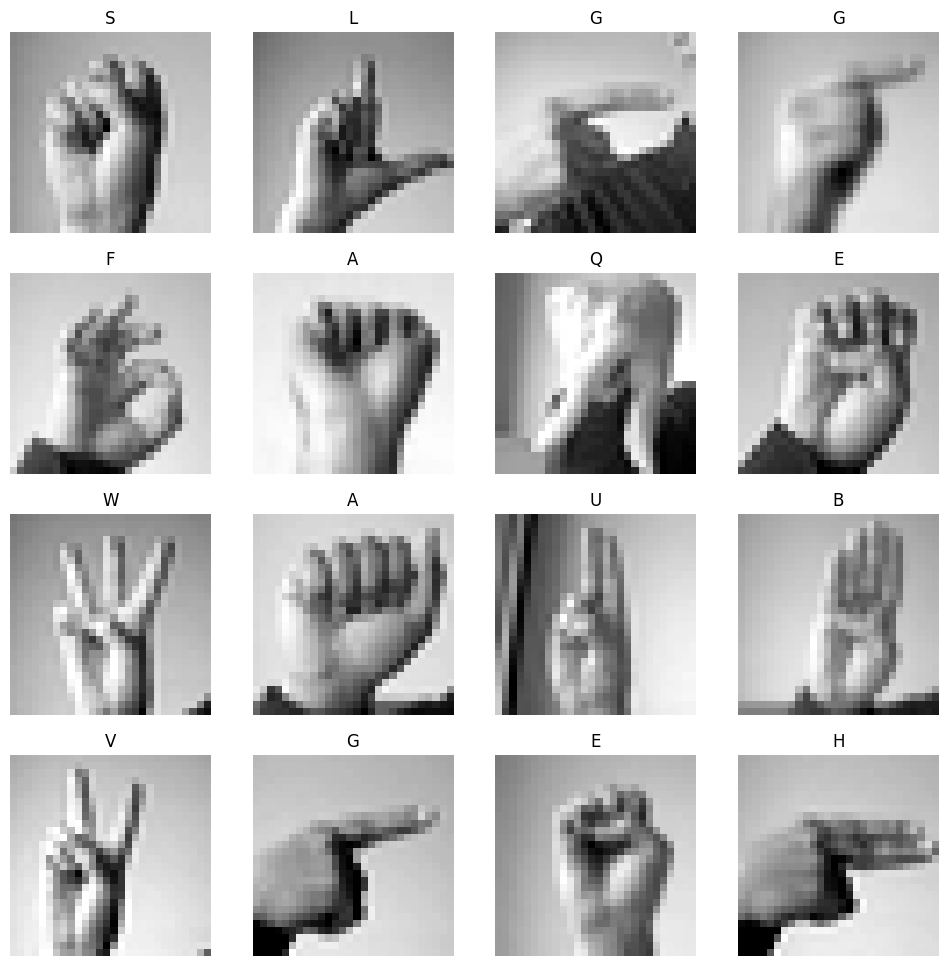

In [118]:
fig, axs = plt.subplots(4,4, figsize = (12,12))

for ax in axs.flatten():
    random_index = np.random.randint(0,train_label.shape[0])
    ax.imshow(train_data[random_index], cmap = 'gray')
    ax.set_title(chr(65 + train_label[random_index]))
    ax.axis('off')
plt.show()

## Train Model

> conv->maxpool->conv->maxpool->flatten->dense->output

In [313]:
cnn_model = tf.keras.Sequential()
cnn_model.add(Input(shape=(28,28,1)))
cnn_model.add(Conv2D(
              filters = 32,
              kernel_size = 2,
              activation = 'relu'))
cnn_model.add(MaxPool2D(pool_size=2))
cnn_model.add(Conv2D(filters = 32,
                     kernel_size = 2,
                    activation = 'relu'))
cnn_model.add(MaxPool2D(pool_size =2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units = 26, activation = 'softmax'))

In [314]:
cnn_model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_89 (Conv2D)                   │ (None, 27, 27, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 12, 12, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,226 (606.35 KB)

 Trainable params: 155,226 (606.35 KB)

 Non-trainable params: 0 (0.00 B)

In [315]:
cnn_model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy']
                 )

In [316]:
cnn_model_history = cnn_model.fit(train_data, train_label,validation_split = 0.3 ,epochs = 5, batch_size = 32)

Epoch 1/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.1923 - loss: 2.7031 - val_accuracy: 0.8368 - val_loss: 0.6408
Epoch 2/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7035 - loss: 0.8860 - val_accuracy: 0.9431 - val_loss: 0.2710
Epoch 3/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8257 - loss: 0.5199 - val_accuracy: 0.9740 - val_loss: 0.1256
Epoch 4/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8775 - loss: 0.3637 - val_accuracy: 0.9948 - val_loss: 0.0622
Epoch 5/5
601/601 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9040 - loss: 0.2713 - val_accuracy: 0.9945 - val_loss: 0.0358


### Model Testing

In [318]:
cnn_model.evaluate(test_data,test_label)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9049 - loss: 0.3477


[0.3409888744354248, 0.9044896960258484]

#### Plot Test with predicted vs true value

In [319]:
test_predicted = cnn_model(test_data)

In [320]:
test_predicted = [np.argmax(i) for i in test_predicted]

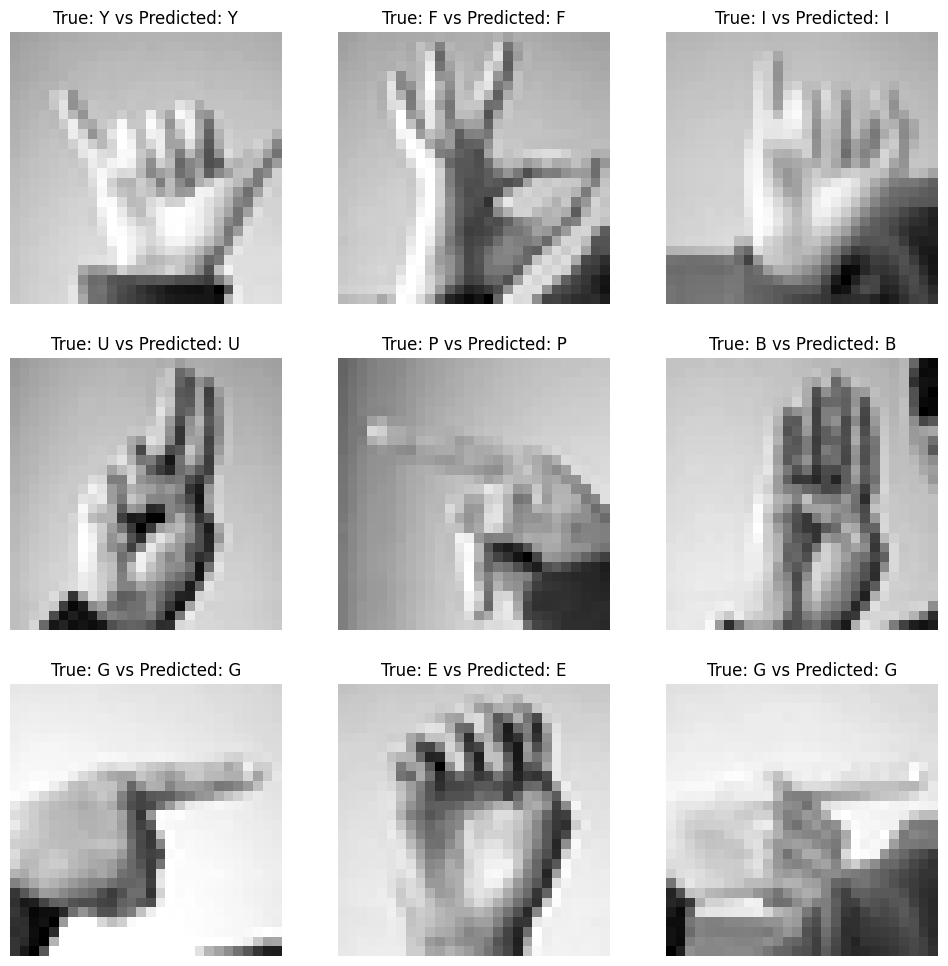

In [321]:
fig, axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    random_index = np.random.randint(0,test_label.shape[0])
    ax.imshow(test_data[random_index], cmap = 'gray')
    ax.set_title(f'True: {chr(65 + test_label[random_index])} vs Predicted: {chr(65 + test_predicted[random_index])}')
    ax.axis('off')
plt.show()

## Model Analysis

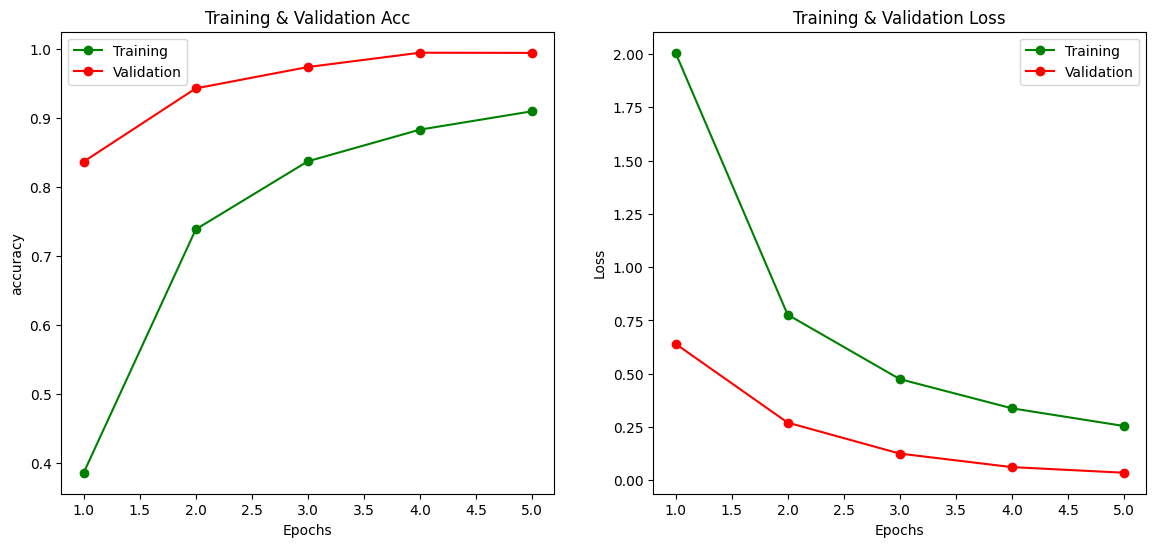

In [322]:
epochs = [x + 1 for x in range(len(cnn_model_history.history['accuracy']))]
_,axs = plt.subplots(1,2 ,figsize = (14,6))
axs[0].plot(epochs,cnn_model_history.history['accuracy'], 'go-',label = 'Training')
axs[0].plot(epochs, cnn_model_history.history['val_accuracy'],'ro-',label = 'Validation')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('accuracy')
axs[0].legend()
axs[0].set_title('Training & Validation Acc')

axs[1].plot(epochs,cnn_model_history.history['loss'], 'go-',label = 'Training')
axs[1].plot(epochs, cnn_model_history.history['val_loss'],'ro-',label = 'Validation')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].set_title('Training & Validation Loss')
plt.show()